# Employee Salary Prediction Model:


The Salary Dataset contains **6704 rows** and **6 columns** containing the following data:

1. **Age**
2. **Gender**
3. **Education Level**
4. **Job Title**
5. **Years of Experience**
6. **Salary**

First we pre-process, clean and model the data to standarsise and structure it.


### Importing the Dependencies :

In [158]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error ,r2_score

## Importing Data:

In [110]:
data = pd.read_csv('Salary_Data.csv')
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [111]:
data.sample(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
2290,32.0,Male,Master's Degree,Product Manager,7.0,110000.0
379,30.0,Male,PhD,Data Scientist,5.0,180000.0
5649,31.0,Female,PhD,Data Scientist,8.0,140000.0
1691,30.0,Male,Master's Degree,Full Stack Engineer,5.0,105000.0
5882,30.0,Male,PhD,Data Scientist,6.0,100000.0


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [113]:
data.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [114]:
# Checking for null data

data.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [115]:
# Dropping null values from dataset

data.dropna(inplace=True)

In [116]:
data.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [117]:
# Checking unique value counts of Job Titles in the dataset

data['Job Title'].value_counts()

Job Title
Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Software Project Manager        1
Name: count, Length: 191, dtype: int64

In [118]:
# Reducing Job titles by omitting titles with less than 25 counts

job_title_count = data['Job Title'].value_counts()
job_title_edited = job_title_count[job_title_count<=25]
job_title_edited.count()

142

In [119]:
# Omitting titles with less than 25 counts

data['Job Title'] = data['Job Title'].apply(lambda x: 'Others' if x in job_title_edited else x )
data['Job Title'].nunique()

50

In [120]:
#Checking unique value count of Education Level

data['Education Level'].value_counts()

Education Level
Bachelor's Degree    2265
Master's Degree      1572
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64

In [121]:
# Combining repeating values of education level

data['Education Level'].replace(["Bachelor's Degree","Master's Degree","phD"],["Bachelor's","Master's","PhD"],inplace=True)
data['Education Level'].value_counts()

Education Level
Bachelor's     3021
Master's       1860
PhD            1369
High School     448
Name: count, dtype: int64

In [122]:
# Checking Unique Value count of Gender

data['Gender'].value_counts()

Gender
Male      3671
Female    3013
Other       14
Name: count, dtype: int64

## Exploratory Data Analysis:

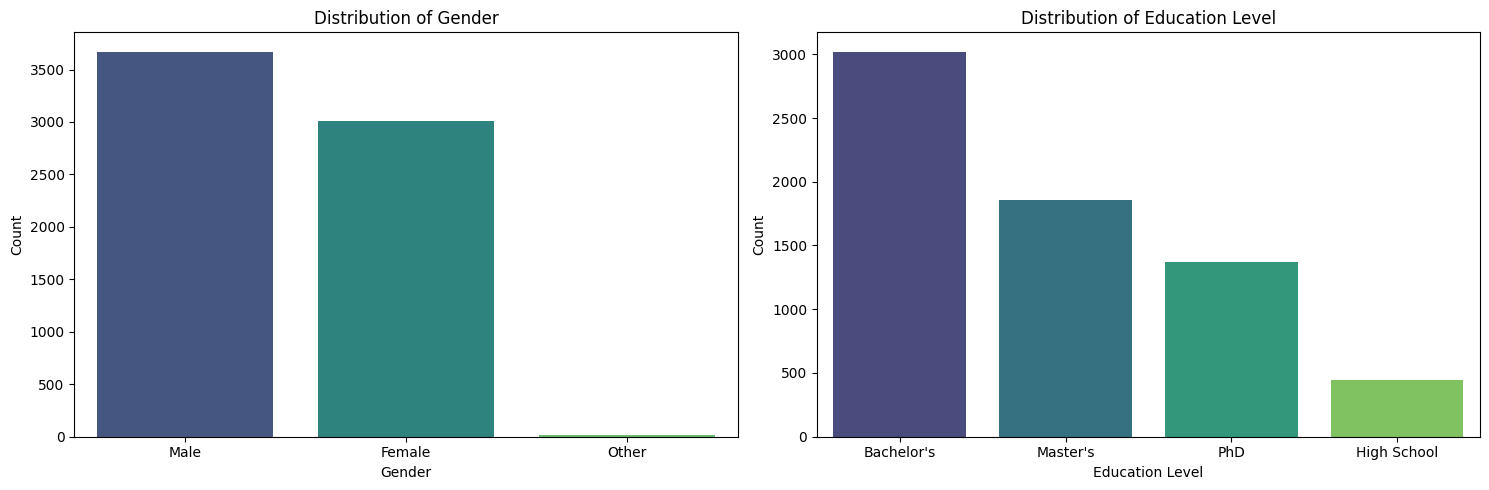

In [123]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot the count of data points for each gender category in the first subplot
sns.countplot(x='Gender', data=data, ax=ax[0], palette='viridis')

# Plot the count of data points for each education level category in the second subplot
sns.countplot(x='Education Level', data=data, ax=ax[1], palette='viridis')

# Add labels and titles for the subplots
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Count')
ax[0].set_title('Distribution of Gender')

ax[1].set_xlabel('Education Level')
ax[1].set_ylabel('Count')
ax[1].set_title('Distribution of Education Level')

# Show the plots
plt.tight_layout()
plt.show()

**Distribution of Gender and Education Level**
    
1. **Distribution of Gender:** The job market is mostly dominated by males with females being second largest group and extremely few people from the third gender. This shows that while women are slowly becoming a part of the workforce, people belonging to other genders do have very few opportunities.
    
2. **Distribution of Education Level:** A majority of working professionals hold a bachelor's degree followed by master's and PhD holders with least hireable being just High school graduates. This means a bachelor's degree is sufficient to enter the workforce and highly in demand by employers.


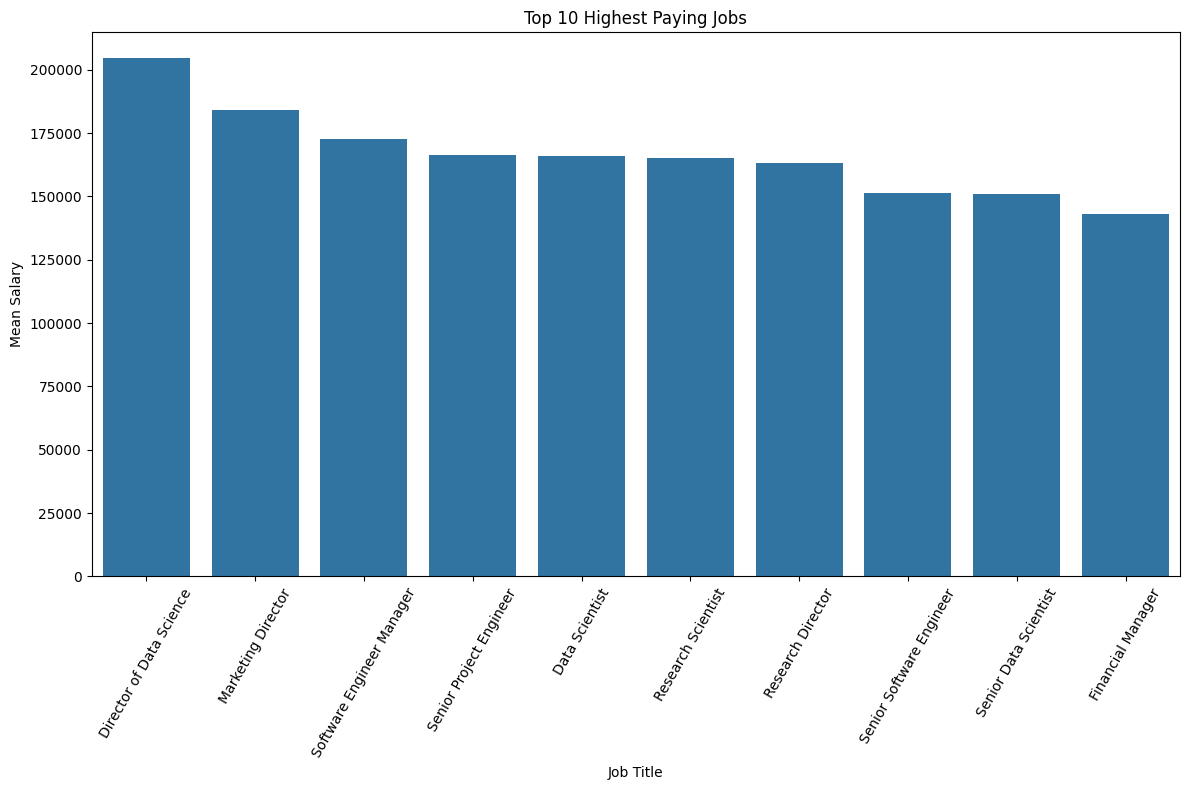

In [124]:
# Get the top 10 job titles with the highest mean salary
top_10_highest_paying_jobs = data.groupby('Job Title')['Salary'].mean().nlargest(10)

# Create a single bar plot for the top 10 highest paying job titles and their mean salaries
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_highest_paying_jobs.index, y=top_10_highest_paying_jobs.values)

# Customize the plot
plt.xlabel('Job Title')
plt.ylabel('Mean Salary')
plt.title('Top 10 Highest Paying Jobs')
plt.xticks(rotation=60)  # Rotate x-axis labels if needed

# Show the plot
plt.tight_layout()
plt.show()


**Top 10 Highest Paying Jobs**
    
The plot shows the Top 10 highest paying jobs in the industry plotted against the mean salary offered for the role. We can see that Data Scientists and Engineers are paid the highest.

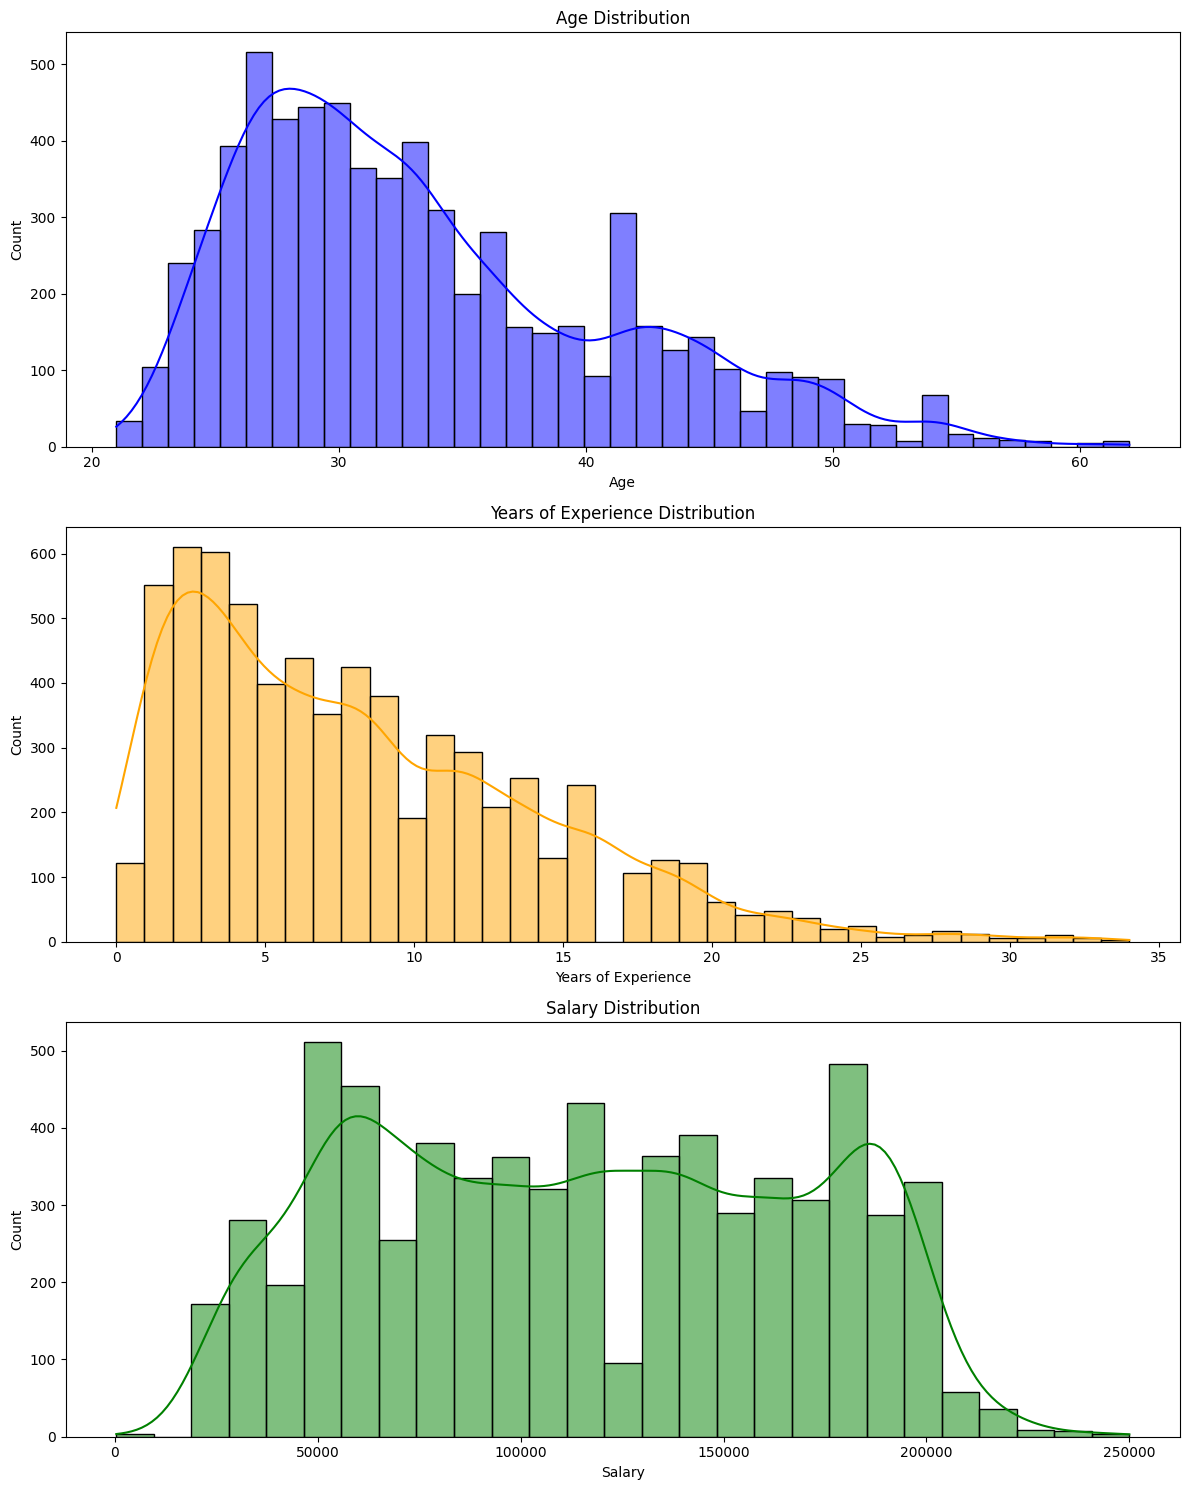

In [125]:
# Create a figure with three subplots
fig, ax = plt.subplots(3, 1, figsize=(12, 15))

# Create a histogram of Age in the first subplot
sns.histplot(data['Age'], ax=ax[0], color='blue', kde=True)
ax[0].set_title('Age Distribution')
ax[0].set_xlabel('Age')

# Create a histogram of Years of Experience in the second subplot
sns.histplot(data['Years of Experience'], ax=ax[1], color='orange', kde=True)
ax[1].set_title('Years of Experience Distribution')
ax[1].set_xlabel('Years of Experience')

# Create a histogram of Salary in the third subplot
sns.histplot(data['Salary'], ax=ax[2], color='green', kde=True)
ax[2].set_title('Salary Distribution')
ax[2].set_xlabel('Salary')

plt.tight_layout()
plt.show()


**Distribution of continuous variables**
    
1. **Age Distribution:** It shows that majority of workforce lies in the 27-31 age range which suggests a highly youthful workforce.
    
2. **Years of Experience Distribution:** The plot shows that maximum workforce has 1-4 years of experience which is in agreement with previous results. Younger workforce has less experience than older counterparts
    
3. **Salary Distribution:** The salary majority of workers earn lies in 50,000-60,000 dollars range while similar count of people earn 1,80,000 as well. The plot reveals that there is a lot of different pay ranges within the community with majority of workers earning less than 1,25,000 dollars yearly.


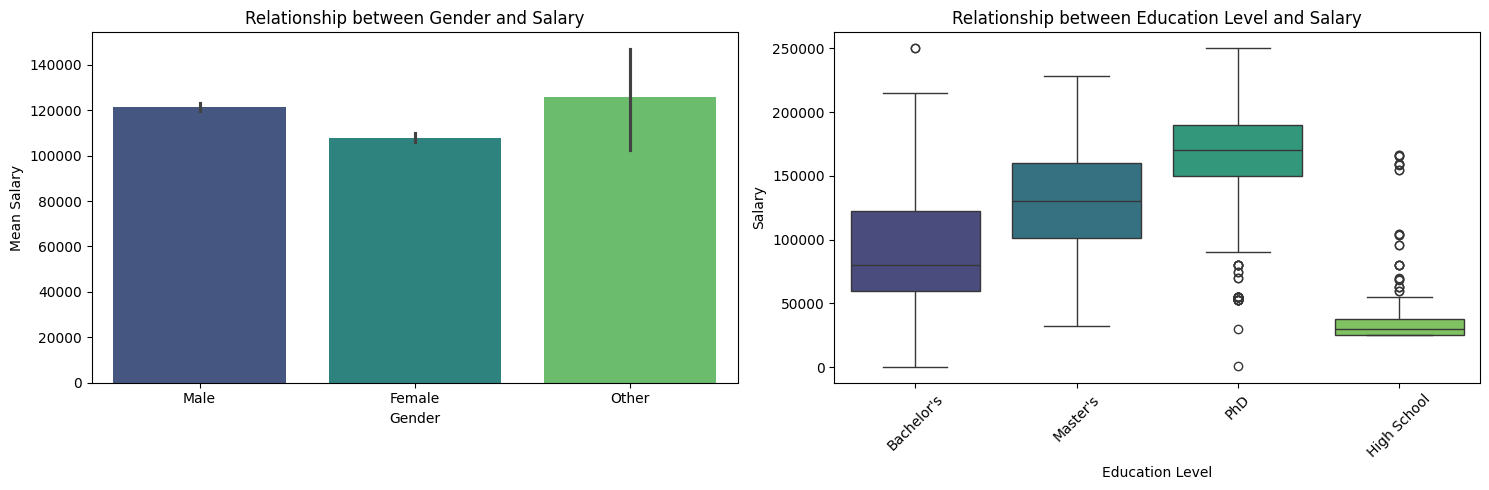

In [126]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Create a bar plot for the relationship between Gender and Salary in the first subplot
sns.barplot(x='Gender', y='Salary', data=data, ax=ax[0], palette='viridis')
ax[0].set(title='Relationship between Gender and Salary', xlabel='Gender', ylabel='Mean Salary')

# Create a box plot for the relationship between Education Level and Salary in the second subplot
sns.boxplot(x='Education Level', y='Salary', data=data, ax=ax[1], palette='viridis')
ax[1].set(title='Relationship between Education Level and Salary', xlabel='Education Level', ylabel='Salary')

# Rotate x-axis labels in the second subplot for better readability
ax[1].tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

**Relationship between discreet variables**
    
1. **Gender and Salary:** Other genders earn more than men and women. Women earn the least out of all three genders.
    
2. **Education Level and Salary:** The plot reveals that as your education level rises, the mean salary level also rises. High school graduates are paid the least and PhD's the highest. The box plot also reveals the range of salaries and it is highest for bacahelr's degree meaning the distribution of salaries is more diverse for bachelor's degree with some earning as much as somone with a Master's degree would.
    

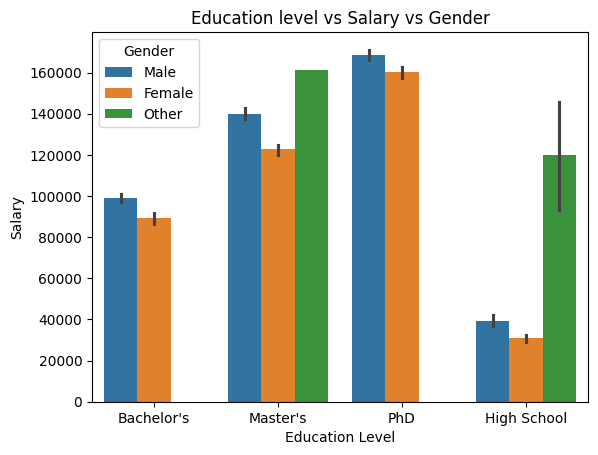

In [127]:
sns.barplot(x='Education Level',y='Salary',data=data,hue='Gender').set(title='Education level vs Salary vs Gender')
plt.show()

**Relationship between Education Level, Salary and Gender**

Following trends from previous charts, men on an average are paid more than women with same education level. Where the third gender is present, they are paid more than both the genders. Also, the more you are educated, the more you are paid.

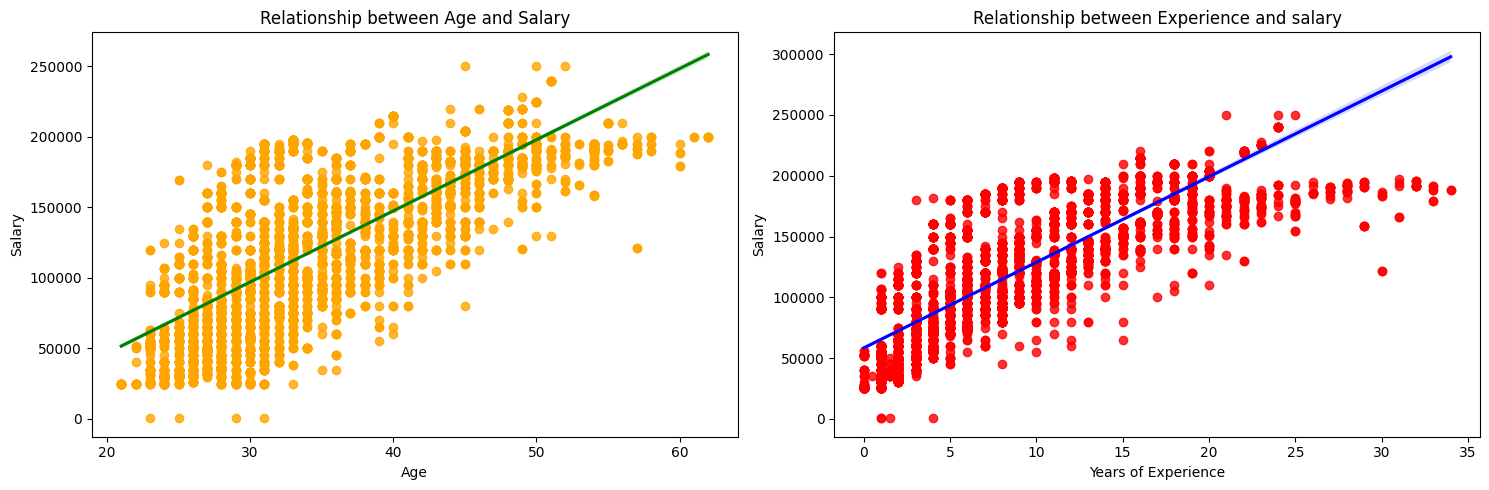

In [128]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot for relationship between age and salary
sns.regplot(x='Age',y='Salary',data=data, scatter_kws={'color':'orange'}, line_kws={'color':'green'}, ax=ax[0])
ax[0].set(title='Relationship between Age and Salary')

# Scatter plot for relationship between experience and salary
sns.regplot(x='Years of Experience',y='Salary',data=data, scatter_kws={'color':'red'}, line_kws={'color':'blue'}, ax=ax[1])
ax[1].set(title='Relationship between Experience and salary')

plt.tight_layout()
plt.show()

1. **Relationship between Age and Salary:** The is strong positive correlation between age and salary meaning older employees get paid more than younger e,ployees.

2. **Relationship between Experience and Salary:** There is strong positive correlation between Experience and salary meaning experienced candidates get paid more. The more experience a candidate gains, the more their salary will become.


In [129]:
#saving our cleaned data
clean_data=pd.DataFrame(data)

In [130]:
# Mapping Education Level column
education_mapping = {"High School": 0, "Bachelor's": 1, "Master's": 2, "PhD": 3}
data['Education Level'] = data['Education Level'].map(education_mapping)

# Label encoding the categorical variable
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

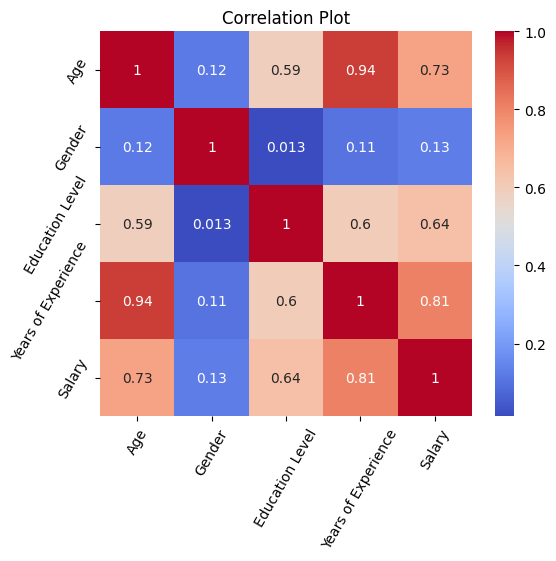

In [131]:
# Correlation plot
plt.figure(figsize=(6, 5))  # Set the figure size
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')  # Use cmap for color map
plt.title('Correlation Plot')
plt.xticks(rotation=60) 
plt.yticks(rotation=60) 
plt.show()


### outliers detection in salary column using IQR method

In [132]:
Q1 = df.Salary.quantile(0.25) # First Quartile
Q3 = df.Salary.quantile(0.75) # Third Quartile

# Caltulation Interquartile
IQR = Q3-Q1

# Deetecting outliers lying 1.5x of IQR above and below Q1 and Q3 resp
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

In [133]:
df[df.Salary>upper]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


**No outliers in Q3**

In [134]:
df[df.Salary<lower]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


**No outliers in Q1**

## Preparing the data for ML analysis by converting categorical job titles into a numerical format:

In [135]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer

In [138]:
X = clean_data.drop('Salary', axis=1)
y = clean_data['Salary']

In [139]:
X

,Age,Gender,Education Level,Job Title,Years of Experience
0,32.0,Male,Bachelor's,Software Engineer,5.0
1,28.0,Female,Master's,Data Analyst,3.0
2,45.0,Male,PhD,Others,15.0
3,36.0,Female,Bachelor's,Sales Associate,7.0
4,52.0,Male,Master's,Others,20.0
...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0
6700,32.0,Male,High School,Sales Associate,3.0
6701,30.0,Female,Bachelor's,Financial Manager,4.0
6702,46.0,Male,Master's,Marketing Manager,14.0


In [140]:
y

0        90000.0
1        65000.0
2       150000.0
3        60000.0
4       200000.0
          ...   
6699    200000.0
6700     50000.0
6701     55000.0
6702    140000.0
6703     35000.0
Name: Salary, Length: 6698, dtype: float64

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [142]:
X_train.shape,X_test.shape

((5358, 5), (1340, 5))

In [143]:
# Sample mapping function
education_mapping = {
    "High School": 0,
    "Bachelor's": 1,
    "Master's": 2,
    "PhD": 3
}

# Custom function to map Education Level
def map_education(X):
    return X.replace(education_mapping)

# Build the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'Years of Experience']),
        ('gender_ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), ['Gender']),
        ('job_ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), ['Job Title']),
        ('edu_map', FunctionTransformer(map_education), ['Education Level'])
    ]
)


In [144]:
X_train_trf=preprocessor.fit_transform(X_train)
X_test_trf=preprocessor.fit_transform(X_test)

In [148]:
X_train_trf.shape

(5358, 54)

In [149]:
X_test_trf.shape

(1340, 54)

## Model training :

In [152]:
LinReg=LinearRegression()
LinReg.fit(X_train_trf,y_train)

LinearRegression()

In [154]:
y_pred=LinReg.predict(X_test_trf)

In [155]:
y_pred

array([123084.84357281,  88869.3903879 , 109837.20277572, ...,
       108943.73267192,  98313.32150701,  63776.67754089])

In [159]:
r2_score(y_test,y_pred)

0.8354204666122327

In [160]:
y_train_pred=LinReg.predict(X_train_trf)

In [162]:
r2_score(y_train,y_train_pred)

0.8346226054262489

## Create a dictionary for defining models and tuning hyperparameters:

In [163]:
model_params = {
    'Linear_Regression':{
        'model':LinearRegression(),
        'params':{
            
        }
    },
    'Decision_Tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'max_depth':[2,4,6,8,10],
            'random_state':[0,42],
            'min_samples_split':[1,5,10,20]
        }
    },
    'Random_Forest':{
        'model':RandomForestRegressor(),
        'params':{
            'n_estimators':[10,30,20,50,80]
        }
    }
}

In [166]:
# Hyper parameter tuning through grid search cv
score = []

for model_name, m in model_params.items():
    clf = GridSearchCV(m['model'], m['params'], cv=5, scoring='neg_mean_squared_error')
    clf.fit(X_train_trf, y_train)

    # Use the best estimator to predict
    best_model = clf.best_estimator_
    y_train_pred = best_model.predict(X_train_trf)

    # R2 score on training set
    r2 = r2_score(y_train, y_train_pred)

    score.append({
        'Model': model_name,
        'Params': clf.best_params_,
        'MSE(-ve)': clf.best_score_,
        'R2 Score (Train)': r2
    })

score_df = pd.DataFrame(score) 

In [167]:
# Order of the best models 

s = pd.DataFrame(score)
sort = s.sort_values(by = 'MSE(-ve)',ascending=False)
sort

,Model,Params,MSE(-ve),R2 Score (Train)
2,Random_Forest,{'n_estimators': 80},-6.856633e+07,0.991342
1,Decision_Tree,"{'max_depth': 10, 'min_samples_split': 5, 'ran...",-1.464883e+08,0.957335
0,Linear_Regression,{},-4.655038e+08,0.834623


In [169]:
# Random Forest model

rfr = RandomForestRegressor(n_estimators=80)
rfr.fit(X_train_trf,y_train)

RandomForestRegressor(n_estimators=80)

In [170]:
rfr.score(X_test_trf,y_test)

0.9731303645038611

In [171]:
y_pred_rfr = rfr.predict(X_test_trf)

print("r2 score :",r2_score(y_test,y_pred_rfr))
print("Mean Squared Error :",mean_squared_error(y_test,y_pred_rfr))
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred_rfr))
print("Root Mean Squared Error :",mean_squared_error(y_test,y_pred_rfr,squared=False))

r2 score : 0.9731303645038611
Mean Squared Error : 76617670.64079645
Mean Absolute Error : 3416.3914423453175
Root Mean Squared Error : 8753.152040310762


In [172]:
# Decision Tree model

dtr = DecisionTreeRegressor(max_depth=10,min_samples_split=5,random_state=0)
dtr.fit(X_train_trf,y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=0)

In [174]:
dtr.score(X_test_trf,y_test)

0.9419379193361227

In [176]:
y_pred_dtr = dtr.predict(X_test_trf)

print("r2 score :",r2_score(y_test,y_pred_dtr))
print("Mean Squared Error :",mean_squared_error(y_test,y_pred_dtr))
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred_dtr))
print("Root Mean Squared Error :",mean_squared_error(y_test,y_pred_dtr,squared=False))

r2 score : 0.9419379193361227
Mean Squared Error : 165561656.89942357
Mean Absolute Error : 7799.704460442098
Root Mean Squared Error : 12867.07647056718


**A bar chart depicting the importance of different features in predicting salary.**

## Conclusion :

**1. The Random Forest model achieved the highest R-squared score (0.973) and the lowest MSE, MAE, and RMSE values, indicating the best predictive performance among the three models.**

**2. The Decision Tree model performed well with an R-squared score of 0.941 but had higher errors compared to the Random Forest.**

**3. The Linear Regression model had the lowest R-squared score (0.834) and the highest errors, suggesting it may not capture the underlying patterns in the data as effectively as the ensemble models.**

In conclusion, the Random Forest model appears to be the most suitable for predicting salaries in this dataset, as it offers the highest predictive accuracy and the lowest error metrics. Further optimization and fine-tuning of the Random Forest model could potentially lead to even better results.

### Saving model and preprocessor:

In [178]:
import pickle
# 1. Save preprocessor
with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

# 2. Save model
with open('model.pkl', 'wb') as f:
    pickle.dump(rfr, f)

In [179]:
data = {
    'Age': [32.0],
    'Gender': ['Male'],
    'Education Level': ["Bachelor's"],
    'Job Title': ['Software Engineer'],
    'Years of Experience': [5.0],
    'Salary': [90000.0]
}

df = pd.DataFrame(data)

In [180]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0


In [183]:
df_trf=preprocessor.transform(df)
rfr.predict(df_trf)[0]

85862.5